In [12]:
using LinearAlgebra, Statistics, Plots, LaTeXStrings

In [3]:
randn()

-0.7982282086003243

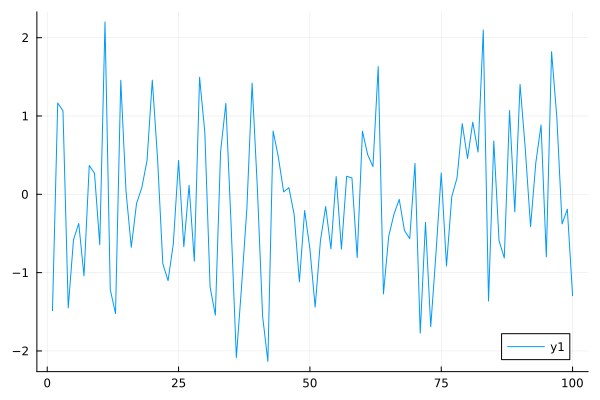

In [4]:
n = 100
ϵ = randn(n)
plot(1:n, ϵ)

In [5]:
typeof(ϵ)

Vector{Float64} (alias for Array{Float64, 1})

In [6]:
ϵ[1:5]

5-element Vector{Float64}:
 -1.4855617133969095
  1.166512969796958
  1.0647124219816604
 -1.4499847688058154
 -0.5796029525809251

In [7]:
# Poor style
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

In [8]:
# better style
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

In [10]:
ϵ_sum = 0.0 # careful to use 0.0 here, instead of 0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
ϵ_mean = ϵ_sum / m

0.2869470974976915

In [11]:
ϵ_mean ≈ mean(ϵ[1:m])
ϵ_mean ≈ sum(ϵ[1:m])/m

true

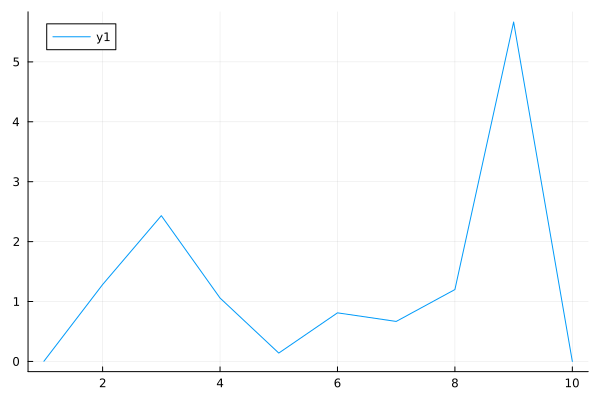

In [13]:
# poor style
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # squaring the result
    end
    return ϵ
end

data = generatedata(10)
plot(data)

In [1]:
# still poor style
function generatedata(n)
    ϵ = randn(n) #use built in function
    
    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2  # squaring the result
    end
    
    return ϵ
end 
data = generatedata(5)

5-element Vector{Float64}:
 0.07668698126435845
 0.16495039000006903
 3.4383716355465705
 5.509575397738019
 0.8332028416814767

In [2]:
# better style
function generatedata(n)
    ϵ = randn(n) # use built in function
    return ϵ.^2
end
data = generatedata(5)

5-element Vector{Float64}:
 0.0047297725234607445
 2.320252792594832
 0.6077582232604748
 0.6222464658701347
 2.808750497131433

In [3]:
# good style
generatedata(n) = rand(n).^2
data = generatedata(5)

5-element Vector{Float64}:
 0.2647854686044735
 0.8327420464605938
 0.016085912829584513
 0.5294284676409058
 0.9660071956393684

In [5]:
# good style
f(x) = x^2 # simple square function
generatedata(n) = f.(rand(n)) # broadcasts on f
data = generatedata(5)

5-element Vector{Float64}:
 0.4429271306579415
 0.12461459742650494
 0.9824404949452732
 0.006546590367997488
 0.013464836909245525

In [6]:
generatedata(n, gen) = gen.(randn(n)) # broadcasts on gn
f(x) = x^2 # simple square function
data = generatedata(5,f) # applies f

5-element Vector{Float64}:
 0.09451633883169465
 6.411501150803197
 2.690489575522543
 0.05591427889891241
 0.11467067510789257

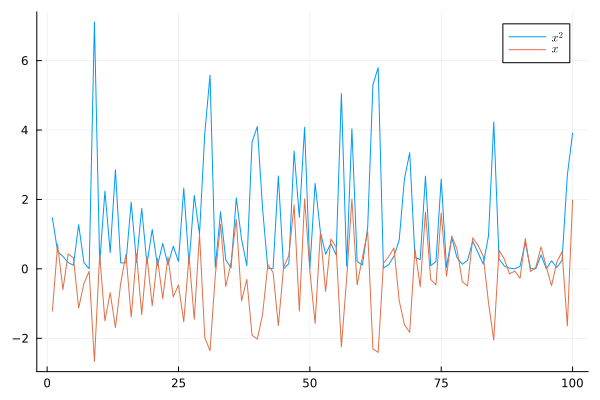

In [14]:
# direct solutiion with broadcasting, and small user-defined function
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label=L"x^2")
plot!(x, label=L"x") # layer on the same plot

In [15]:
using Distributions

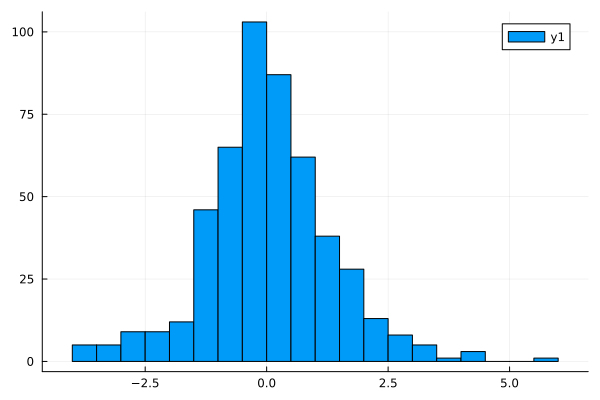

In [16]:
function plothistogram(distribution, n)
    ϵ = rand(distribution, n) # n draws from distribution
    histogram(ϵ)
end

lp = Laplace()
plothistogram(lp, 500)

In [2]:
rand(3)

3-element Vector{Float64}:
 0.9104896386502431
 0.19412312067209403
 0.22730757045185257

In [4]:
using Distributions